In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from vega_datasets import data

In [2]:
# Load the data
df = data.seattle_weather().set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
# Create a year column
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,year
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [6]:
# How many days in each year in df?
df.year.value_counts()

2012    366
2015    365
2014    365
2013    365
Name: year, dtype: int64

In [18]:
for year, subset in df.groupby('year'): # iteration through list of tuples
    print(year)
    print(subset.head(1))
    print()

2012
            precipitation  temp_max  temp_min  wind  weather  year
date                                                              
2012-01-01            0.0      12.8       5.0   4.7  drizzle  2012

2013
            precipitation  temp_max  temp_min  wind weather  year
date                                                             
2013-01-01            0.0       5.0      -2.8   2.7     sun  2013

2014
            precipitation  temp_max  temp_min  wind weather  year
date                                                             
2014-01-01            0.0       7.2       3.3   1.2     sun  2014

2015
            precipitation  temp_max  temp_min  wind weather  year
date                                                             
2015-01-01            0.0       5.6      -3.2   1.2     sun  2015



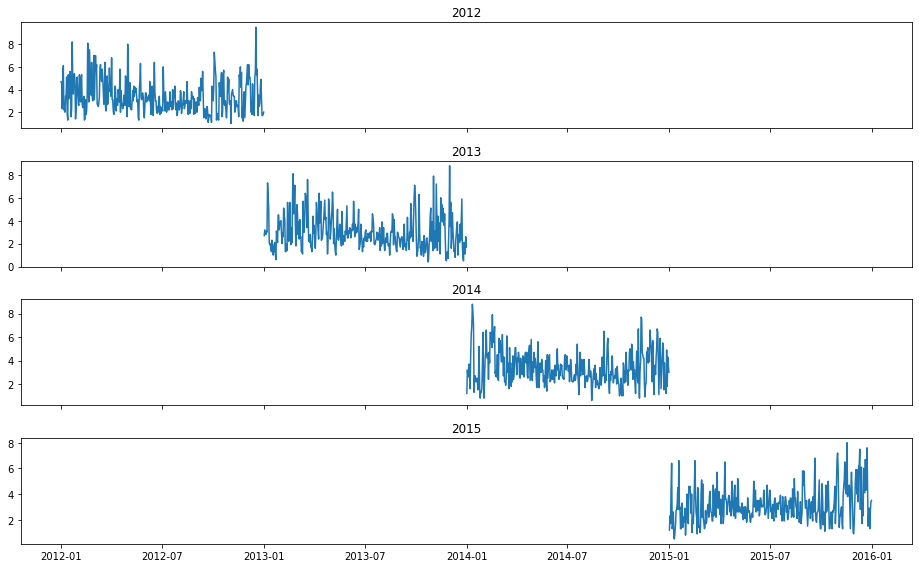

In [41]:
# Create fig and ax objects
fig, axs = plt.subplots(4, 1, figsize=(13, 8), sharex=True)

for ax, (year, subset) in zip(axs, df.groupby('year')):
    # ax = the axis for one subplot
    # year = a string, the current group
    # subset = a dataframe with the data for that year
    ax.plot(subset.index, subset.wind)
    ax.set(xlabel='', title=year)
fig.tight_layout()

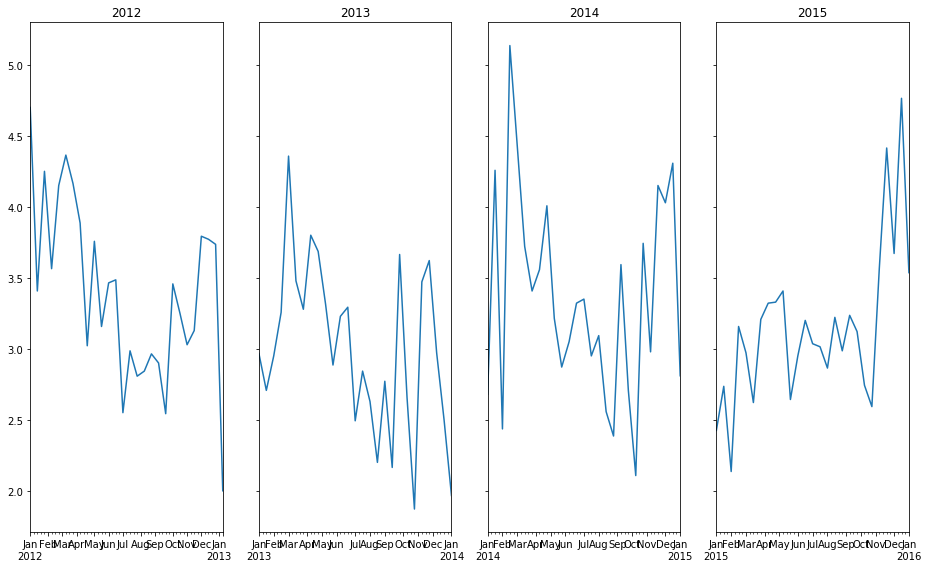

In [39]:
# Create fig and ax objects
fig, axs = plt.subplots(1, 4, figsize=(13, 8), sharey=True)

for ax, (year, subset) in zip(axs, df.groupby('year')):
    # ax = the axis for one subplot
    # year = a string, the current group
    # subset = a dataframe with the data for that year
    subset.resample('2W').wind.mean().plot(ax=ax, title=year)
    ax.set(xlabel='', title=year)
fig.tight_layout()

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

In [47]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)
list(x)

[('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica')]